<div class="alert alert-block alert-info" style="background-color: #301E40; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<br/><br/>
<h1 style="font-size: 45px; color: white; align: center;"><center>
<img src="https://raw.githubusercontent.com/HumbleData/beginners-data-workshop/master/media/humble-data-logo-white-transparent.png" width="250px" /><br/><br/>
Data visualization with Seaborn
</center></h1>
</div>

## About seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics, which is very powerful for visualizing categorical data.

![](https://d1rwhvwstyk9gu.cloudfront.net/2017/07/seaburn-1.png)

We will be using the [Pokemon.csv](https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6). Let's have a look at the data:

In [2]:
import pandas as pd

pokemon_df = pd.read_csv('../data/Pokemon/pokemon.csv', index_col=0)
pokemon_df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


---

<div class="alert alert-block alert-warning" style="padding: 0px; padding-left: 20px; padding-top: 5px;"><h2 style="color: #301E40">
Categorical scatterplots
</h2><br>
</div>

For example, we want to compare the Attack of different type of Pokemon, to see if any type is generally more powerful than the others:

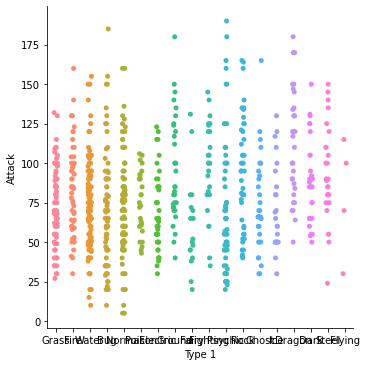

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Type 1", y="Attack", data=pokemon_df);

When import, we usually simplify 'seaborn' as 'sns'. (It's a [West Wing / Rob Lowe](https://en.wikipedia.org/wiki/Sam_Seaborn) reference!) Note that we have to also have to import matplotlib.pyplot because Seaborn is a library that sit on top of matplotlib. We got a plot but it looks ugly and not readable, let's add some configuration to make it nicer.

**Try: adding `aspect=2.5` as the last arguments in the following `sns.catplot`**

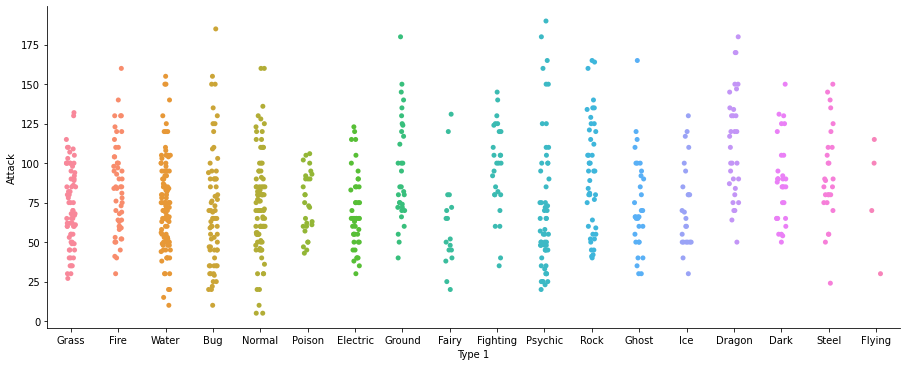

In [4]:
sns.catplot(x="Type 1", y="Attack", data=pokemon_df, aspect=2.5);

So you can see that by adding 'aspect' we make the plot wider. The width of the plot is equal to 'aspect * height' so by adding 'aspect' we increase the width of the plot. It is one of the configuration we can add to the plot. For the whole list and their details, we can refer to the [official documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) but we will give an introduction to a few common ones.

For example, here we see that there's a random x-axis offset for all the points so we can see them without dots overlapping each other. This is done by the 'jitter' setting which is default to True. Let's turn it off and see how it looks like:

**Try: adding `jitter=False` as the last arguments in the following `sns.catplot`**

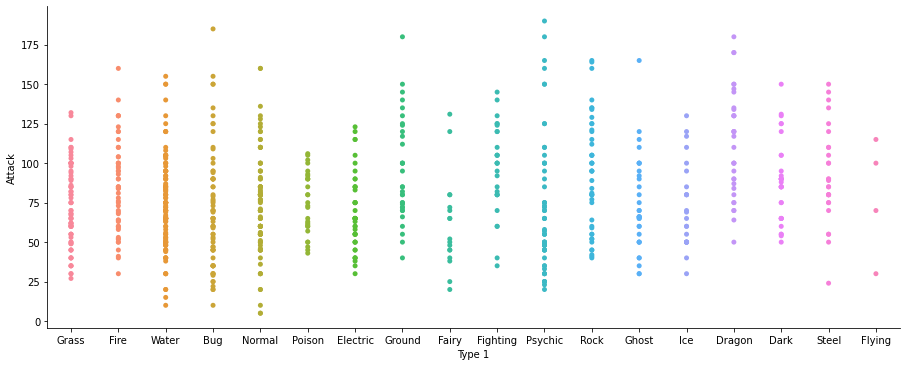

In [5]:
sns.catplot(x="Type 1", y="Attack", data=pokemon_df, aspect=2.5, jitter=False);

So we now have a plot that points are align according to their catagories without the x-axis offsets. Which one to use is depending on if the population of the value (e.g. Attack) is important. In our case, we want to know how the Attack is distributed in each Type so many be it's good to have 'jitter' on, or even better if we can spread it out even more and show the distribution:

**Try: adding `kind="swarm"` as the last arguments in the following `sns.catplot`**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


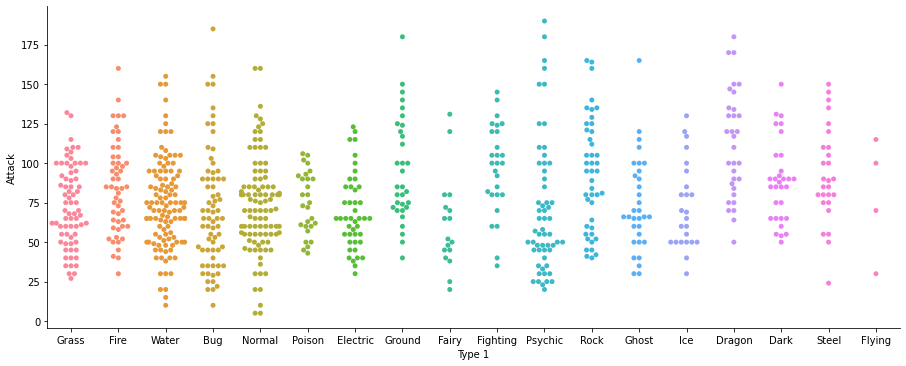

In [6]:
sns.catplot(x="Type 1", y="Attack", data=pokemon_df, aspect=2.5, kind='swarm');

Here we can do it by setting 'kind' to 'swarm' so the points are not overlapping. The disadvantage is that this ploy will need more space horizontally. Imagine we don't want to make the plot super wide due to the limitation of the paper. We can turn it 90 degrees by flipping the x and the y,also we would adjust the aspect and the height:

**Try: swap `x` and `y`,  and add `height=12, aspect=0.6, kind="swarm"` in the arguments of the following `sns.catplot`**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


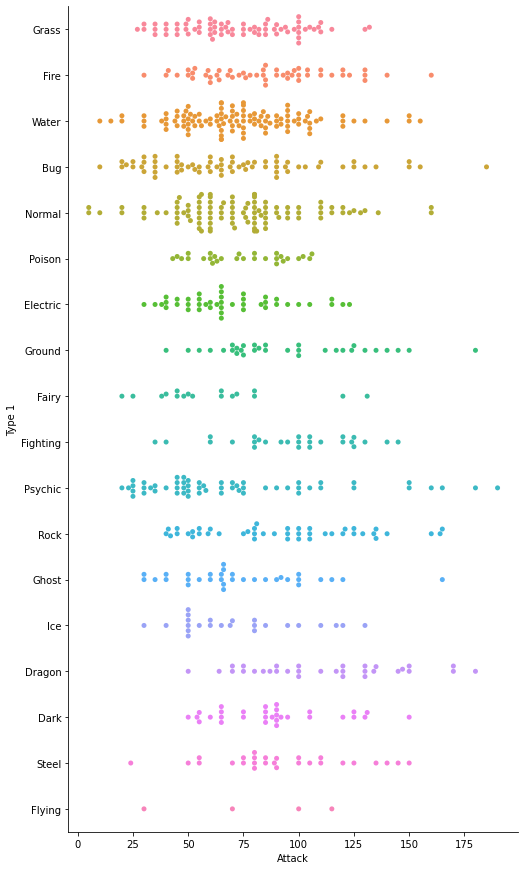

In [7]:
sns.catplot(y="Type 1", x="Attack", data=pokemon_df, height=12, aspect=0.6, kind='swarm');

There are a few thing we can observe so far:

1. For some Types, like Psychic has a very large range of Attack with a long tail the end (i.e. some Physic Types has very high Attack power while most of the Psychic type does not).

2. On the other hand, the Poison type are mostly in the range of 40-110 Attacks.

3. In general Dragon Types have more Attack power than Fairy, but there are 2 Fairy type that has more attack power.

However, we would like to look deeper: I have a theory that Legendary Pokemon are more powerful. let's colour code according to 'Legendary' to see if the pokemon is Legendary or not will have something to do with the Attack of the pokemon:

**Try: adding `hue="Legendary"` as the last arguments in the following `sns.catplot`**

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

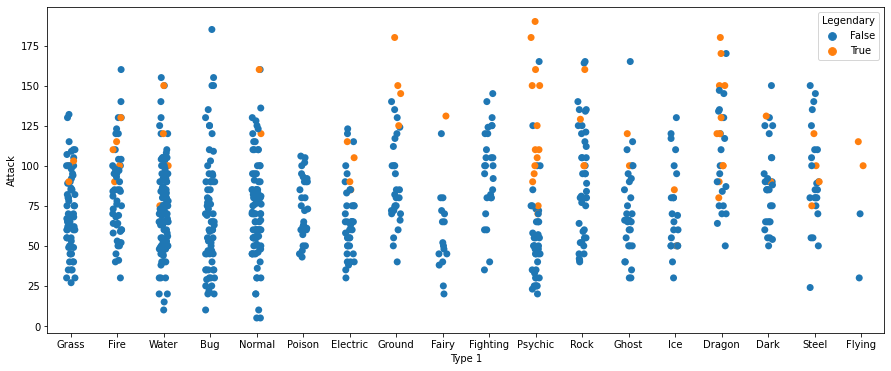

In [8]:
plt.figure(figsize=(15, 6))
sns.stripplot(x="Type 1", y="Attack", data=pokemon_df, size=7, hue='Legendary')

Ah ha! We see that a lot of the Psychic Type that has higher that others in Attack is actually Legendary pokemon. That also happen to the Ground Type and the Flying type.

### Exercise
Now it's your turn to do some analysis. Pick a property of the Pokemon: HP, Defense, Sp. Atk, Sp. Def or Speed and do the similar analysis as above to see if you can find any interesting facts about Pokemon.

---

<div class="alert alert-block alert-warning" style="padding: 0px; padding-left: 20px; padding-top: 5px;"><h2 style="color: #301E40">
Building structured multi-plot grids
</h2><br>
</div>

Sometimes, we would have multiple plots in one graph for comparison. One way to do it in seaborn is to use FacetGrid. The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. In the following, we will be using FacetGrid to see if there is a difference for our analysis above across different Generations.

To make a FacetGrid, we can do the following:

In [ ]:
g = sns.FacetGrid(pokemon_df, col="Generation")

Look we have 6 plot areas which match as the number of different of Generations that we have
(we can check what are the different Generations like this):

In [ ]:
pokemon_df["Generation"].unique()

However, we would like to have the plots align vertically rather than horizontally.

**Try: replace `col` with `row` in the following `sns.FacetGrid`**

In [ ]:
g = sns.FacetGrid(pokemon_df, col="Generation")

Ok, now we have the layout, how we gonna to put the plot in? For some plots, it could be done with the [FacetGrid.map()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.map.html#seaborn.FacetGrid.map) method, for example, using sns.countplot to count how many Pokemon in different types:

In [ ]:
g = sns.FacetGrid(pokemon_df, row="Generation", aspect=3.5)
g.map(sns.countplot, "Type 1");

But with sns.catplot that we used before, this are even simpler. As catplot is already a FacetGrid , we can directly add the `row` or `col` setting to it.

**Try: adding `row="Generation"` as the last arguments in the following `sns.catplot`**

In [ ]:
plt.figure(figsize=(15, 6))
sns.stripplot(x="Type 1", y="Attack", data=pokemon_df, size=7, hue="Legendary")

Now you see that in each generation, the Legendary Pokemon are outliers with super attack powers comparing with the others within their own generation. For details using FacetGrids, you can see the official documentation here: https://seaborn.pydata.org/tutorial/axis_grids.html